# Ejemplo de Algoritmo Genético: el problema de la mochila

### El problema de la Mochila

El problema de la Mochila o KP (del inglés Knapsack problem) es un problema de optimización que consiste en llenar una mochila de un conjunto de artículos de diferentes pesos y valores, tomando en cuenta una restricción en el peso de la mochila, se busca:
* Maximizar el valor con artículos que caben en la mochila.
* Minimizar el peso que se pueden llevar en la mochila.

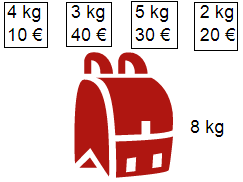

Forma de obtener el resultado es comparar todas las combinaciones posibles que puedo hacer con el número de objetos. Si tengo 0 objetos, solo tengo una combinación, no meter objetos a la mochila. Si tengo 1 objeto puedo meter ese objeto o no meter ese objeto a la mochila, 2 combinaciones. Si tengo 2 objetos, tengo o no meter ningún objeto, meter uno de los dos objetos o los 2 objetos, 4 combinaciones…

Núm. Objetos | Combinaciones
--------------------|------------------------
0                  | 1
1                  | 2
2                  | 4
3                  | 16
...                | ....
n                  | $$ 2^n $$


Es un problema del tipo NP, no determinista en tiempo polinómico. Dejo el link de la explicación de qué es un problemas NP del matemático Eduardo Sáenz de Cabezón en su canal de Derivando: [What is the P versus NP problem?](https://www.youtube.com/watch?v=UR2oDYZ-Sao)


### Modelado como AG

Podemos considerar a cada una de las combinaciones como individuos de una población, y representar su código genético con 1 y 0 para determinar su cadena genética. Por ejemplo, si tenemos 4 objetos, la representación de la cadena genética del individuo donde no seleccionamos ningún objeto es
$$ [0,0,0,0] $$
Y la del individuo donde seleccionamos el primero y le último objeto es:
$$ [1,0,0,1] $$
Tenemos dos operaciones "Cruce"
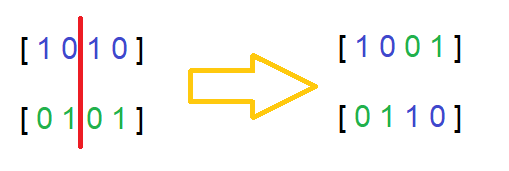
Y mutación:

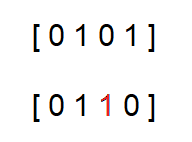

In [1]:
import numpy as np

def isNaN(num):
    if float('-inf') < float(num) < float('inf'):
        return False 
    else:
        return True

w = [2,4,4,6,4,3,5,2] # Pesos
v = [4,10,12,3,10,40,30,20] # Valores

weight = 8 # Restricción
col = 8 # Núm. Objetos
row = 4 # Núm. Valores
com = 2 ** col

print("Pesos: ", w)
print("Valores: ", v)
print("Combinaciones: ", com)

Pesos:  [2, 4, 4, 6, 4, 3, 5, 2]
Valores:  [4, 10, 12, 3, 10, 40, 30, 20]
Combinaciones:  256


In [2]:
rand_pop = np.random.randint(0,2,(row,col)) 
rand_popTemp = np.random.randint(0,2,(row,col))

addZeros = np.zeros((row,8))
rand_pop = np.append(rand_pop, addZeros, axis=1)

print("Población inicial calculada con números aleatorios:\n ", rand_pop)

Población inicial calculada con números aleatorios:
  [[1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [4]:
# La iteración principal comienza desde aquí.
maxVal = 0
capIndividual = []
for itr in range(200): # Iterar todo el proceso
    print("\n Iteración:",itr+1)

    for i in range(4):
        sumWeight = sum(np.multiply(w, rand_pop[i,0:col])) # Cálculo del peso total
        rand_pop[i,col] = sumWeight
        sumValue = sum(np.multiply(v, rand_pop[i,0:col])) # Cálculo del valor total
        
        if sumWeight>weight: # Revisa la restricción
            sumValue = 0
            rand_pop[i,col+1] = sumValue
            continue
        
        rand_pop[i,col+1] = sumValue
        
        if maxVal<sumValue:
            maxVal = sumValue
            capIndividual = rand_pop[i,0:col]
        
    print("Población: \n",rand_pop[:,0:col])
    
    # Cálculo de las aptitudes
    for i in range(row):
        rand_pop[i,col+2] = rand_pop[i,col+1]/np.average(rand_pop[:,col+1])
        if isNaN(rand_pop[i,col+2])==True:
            rand_pop[i,col+2] = 0
        rand_pop[i,col+3] = round(rand_pop[i,col+2])
        
    print("Los pesos y valores de los individuos: \n", rand_pop[:,col:col+4].tolist())
    print("\n La suma es: ",sum(rand_pop[:,col+1]))
    print("El promedio es: ",np.average(rand_pop[:,col+1]))
    
    # Formación de próxima generación
    count = 0
    c = 0
    for i in range(row):
        noc = rand_pop[i,7]
        count +=noc
        if count>row:
            noc -=1
            
        for j in range(int(noc)):
            rand_popTemp[c] = rand_pop[i,0:col]
            c +=1
    rand_pop[:,0:col] = rand_popTemp
    
    print("\nLa siguiente generación: \n",rand_pop[:,0:col])
    
    # Comienza el cruce
    # Selección aleatoria de índices para cruce
    dup = np.array([])
    while 1:
        ranIndex = np.random.randint(low=0, high=row, size=2)
        u, c = np.unique(ranIndex, return_counts=True)
        dup = u[c > 1]
        if dup.size == 0:
            break
    print("Se seleccionan al azar dos individuos: ")
    
    c = 0
    for i in ranIndex:
        rand_popTemp[c] = rand_pop[i,0:col]
        c += 1
        
    k = np.random.randint(low=1, high=col, size=1) # Identificación del sitio de cruce al azar
    print("Lugar del cruce: ",int(k))
    print("Antes del cruce: \n",rand_popTemp[0:2])
    
    a = []
    b =[]
    a = rand_popTemp[0,int(k):col].tolist()
    b = rand_popTemp[1,int(k):col].tolist()
    rand_popTemp[1,int(k):col] = a
    rand_popTemp[0,int(k):col] = b
    print("Después del cruce: \n",rand_popTemp[0:2])
    
    c = 0
    for i in ranIndex:
        rand_pop[i,0:col] = rand_popTemp[c]
        c += 1
    
    print("\nLa próxima generación después del cruce: \n",rand_pop[:,0:col])
    
    # Empieza la mutación
    rand_r = int(np.random.randint(0,row,(1,1))) 
    rand_c = int(np.random.randint(0,col,(1,1))) 
    print("Posición del bit a mutar: [",rand_r,",",rand_c,"]")
    rand_pop[rand_r,rand_c] = 1-int(rand_pop[rand_r,rand_c])
    print("\nDespués de la mutación: \n",rand_pop[:,0:col])
    
    print("La mejor solución (individuo) es: ",capIndividual," con el mejor valor ",maxVal, "\n-------------------")


 Iteración: 1
Población: 
 [[0. 0. 1. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 0. 1.]
 [0. 1. 1. 0. 1. 1. 0. 1.]]
Los pesos y valores de los individuos: 
 [[15.0, 0.0, 0.0, 0.0], [16.0, 0.0, 0.0, 0.0], [19.0, 0.0, 0.0, 0.0], [17.0, 0.0, 0.0, 0.0]]

 La suma es:  0.0
El promedio es:  0.0

La siguiente generación: 
 [[0. 0. 1. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 0. 1.]
 [0. 1. 1. 0. 1. 1. 0. 1.]]
Se seleccionan al azar dos individuos: 
Lugar del cruce:  2
Antes del cruce: 
 [[0 0 1 1 0 1 0 1]
 [0 0 1 1 1 1 0 1]]
Después del cruce: 
 [[0 0 1 1 1 1 0 1]
 [0 0 1 1 0 1 0 1]]

La próxima generación después del cruce: 
 [[0. 0. 1. 1. 1. 1. 0. 1.]
 [1. 0. 1. 0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 0. 1. 0. 1.]
 [0. 1. 1. 0. 1. 1. 0. 1.]]
Posición del bit a mutar: [ 0 , 6 ]

Después de la mutación: 
 [[0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 0. 1. 0. 1.]
 [0. 1. 1. 0. 1. 1. 0. 1.]]
La mejor solución (individuo) es:  []  con el mej

<ipython-input-4-3ce6f5b77ec9>:27: RuntimeWarning: invalid value encountered in double_scalars
  rand_pop[i,col+2] = rand_pop[i,col+1]/np.average(rand_pop[:,col+1])



Se seleccionan al azar dos individuos: 
Lugar del cruce:  2
Antes del cruce: 
 [[0 1 0 0 1 1 1 1]
 [0 1 0 0 1 1 1 1]]
Después del cruce: 
 [[0 1 0 0 1 1 1 1]
 [0 1 0 0 1 1 1 1]]

La próxima generación después del cruce: 
 [[0. 1. 1. 0. 1. 1. 1. 1.]
 [0. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 1. 1. 1.]]
Posición del bit a mutar: [ 2 , 3 ]

Después de la mutación: 
 [[0. 1. 1. 0. 1. 1. 1. 1.]
 [0. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 1. 1. 1.]]
La mejor solución (individuo) es:  [0. 1. 0. 0. 1. 1. 1. 1.]  con el mejor valor  64.0 
-------------------

 Iteración: 57
Población: 
 [[0. 1. 1. 0. 1. 1. 1. 1.]
 [0. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 1. 1. 1.]]
Los pesos y valores de los individuos: 
 [[22.0, 0.0, 0.0, 0.0], [18.0, 0.0, 0.0, 0.0], [17.0, 0.0, 0.0, 0.0], [18.0, 0.0, 0.0, 0.0]]

 La suma es:  0.0
El promedio es:  0.0

La siguiente generación: 
 [[0. 1. 1. 0. 1. 1. 1. 1.]
 [0. 1. 0. 0. 1. 1. 1

 [0. 1. 0. 0. 0. 1. 0. 1.]]
La mejor solución (individuo) es:  [0. 1. 1. 0. 0. 1. 0. 1.]  con el mejor valor  64.0 
-------------------

 Iteración: 99
Población: 
 [[0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 1. 0. 0. 0. 1. 0. 1.]]
Los pesos y valores de los individuos: 
 [[9.0, 0.0, 0.0, 0.0], [13.0, 0.0, 0.0, 0.0], [14.0, 0.0, 0.0, 0.0], [9.0, 0.0, 0.0, 0.0]]

 La suma es:  0.0
El promedio es:  0.0

La siguiente generación: 
 [[0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 1. 0. 0. 0. 1. 0. 1.]]
Se seleccionan al azar dos individuos: 
Lugar del cruce:  1
Antes del cruce: 
 [[0 0 0 0 1 1 1 1]
 [0 1 0 0 0 1 0 1]]
Después del cruce: 
 [[0 1 0 0 0 1 0 1]
 [0 0 0 0 1 1 1 1]]

La próxima generación después del cruce: 
 [[0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 1. 1. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0. 1.]]
Posición del bit a mutar: [ 2 , 1 ]

Después de la mutación: 
 [[0. 0. 0. 0. 1. 1. 1. 

 [1. 0. 1. 1. 0. 1. 1. 1.]]
Los pesos y valores de los individuos: 
 [[22.0, 0.0, 0.0, 0.0], [18.0, 0.0, 0.0, 0.0], [11.0, 0.0, 0.0, 0.0], [22.0, 0.0, 0.0, 0.0]]

 La suma es:  0.0
El promedio es:  0.0

La siguiente generación: 
 [[1. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 1. 1. 1. 1.]
 [1. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 1. 1. 0. 1. 1. 1.]]
Se seleccionan al azar dos individuos: 
Lugar del cruce:  6
Antes del cruce: 
 [[0 0 1 0 1 1 1 1]
 [1 0 1 0 0 1 0 1]]
Después del cruce: 
 [[0 0 1 0 1 1 0 1]
 [1 0 1 0 0 1 1 1]]

La próxima generación después del cruce: 
 [[1. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 1. 1. 0. 1.]
 [1. 0. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 1. 0. 1. 1. 1.]]
Posición del bit a mutar: [ 2 , 6 ]

Después de la mutación: 
 [[1. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 1. 1. 0. 1.]
 [1. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 1. 1. 0. 1. 1. 1.]]
La mejor solución (individuo) es:  [0. 0. 1. 0. 1. 1. 0. 1.]  con el mejor valor  64.0 
-------------------

 Iteración: 147
Población: 
 [[1. 0. 0. 1. 1. 1. 

 [[1 0 0 1 0 1 1 1]
 [1 0 0 1 1 1 1 1]]

La próxima generación después del cruce: 
 [[1. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 0. 0. 1. 0. 0. 1. 1.]
 [1. 0. 0. 1. 0. 1. 1. 1.]]
Posición del bit a mutar: [ 2 , 0 ]

Después de la mutación: 
 [[1. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 0. 0. 1. 1.]
 [1. 0. 0. 1. 0. 1. 1. 1.]]
La mejor solución (individuo) es:  [1. 1. 0. 1. 1. 1. 1. 1.]  con el mejor valor  64.0 
-------------------

 Iteración: 194
Población: 
 [[1. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 0. 0. 1. 1.]
 [1. 0. 0. 1. 0. 1. 1. 1.]]
Los pesos y valores de los individuos: 
 [[22.0, 0.0, 0.0, 0.0], [26.0, 0.0, 0.0, 0.0], [13.0, 0.0, 0.0, 0.0], [18.0, 0.0, 0.0, 0.0]]

 La suma es:  0.0
El promedio es:  0.0

La siguiente generación: 
 [[1. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 0. 0. 1. 1.]
 [1. 0. 0. 1. 0. 1. 1. 1.]]
Se seleccionan al azar dos individuos: 
Lugar del cruce:  5
Antes del cruce: 

Experimentos reales que demuestran que la evolución es real:
 * [El Experimento Evolutivo Más Largo del Mundo](https://www.youtube.com/watch?v=_RAg5--kIm0&t=506s)
 * [Desnudando la evolución de una bacteria resistente](https://www.youtube.com/watch?v=rrfJEZ3m1Tc)

Ejemplos de Algoritmos Genéticos:
 * [Genetic algorithms - evolution of a 2D car in Unity](https://www.youtube.com/watch?v=FKbarpAlBkw)
 * [Karl Sims - Evolving Virtual Creatures With Genetic Algorithms](https://www.youtube.com/watch?v=bBt0imn77Zg&t=70s)
 
#### Sugerencia bibliográfica:
 A.E. Eiben y J.E. Smith
 "Introduction to Evolutionary Computing"
 Edit Springer
 
#### AlducÍn y su ignorancia sobre la Inteligencia Artificial
  * [Armando Alducin - ¿Qué opina de la Inteligencia Artificial?](https://www.youtube.com/watch?v=O386weHAkqk)
 
#### Recomendaciones para AlducÍn
  * [¿Cómo pronunciar Friedrich Nietzsche?](https://www.youtube.com/watch?v=X76Hr9cE0D8)
  * [Carta de Einstein a Roosevelt](http://www.dannen.com/ae-fdr.html)
  * [An Incredible Interactive Chart of Biblical Contradictions](https://friendlyatheist.patheos.com/2013/08/19/an-incredible-interactive-chart-of-biblical-contradictions/)